# Comparativo entre Classificação

Por Thierry Pierre e Vinícius Lettiéri.

Para esse trabalho utilizaremos dados de potabilidade de água do seguinte dataset: https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("../dados/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Colunas

* ph - Avaliação química de ácido-base [Recomendado 6.5-8.5]
* Hardness - Capacidade de água precipitar sabão, de acordo com a quantidade de cálcio e magnésio
* Solids - Total de materiais sólidos dissolvidos na água, geralmente minerais
* Chloramines - Quantidade de cloro presente na água [Recomendado 4mg/L]
* Sulfate - Quantidade de sulfato na água
* Conductivity - Nível de condutividade da água, relacionado a quantidade de íons presentes [Não deve exceder 400 micro S/cm]
* Organic_carbon - Total de carbono ôrganico na água [Recomendado para <2mg/L para beber e <4mg/L em água de tratamento]
* Trihalomethanes - Varia de acordo com a quantidade de material orgânico e de cloro na água e a temperatura [Recomendado <80 ppm]
* Turbidity	- Quantidade de sólidos em estado suspenso [Recomendado < 5 NTU]
* Potability - Coluna de classificação da potabilidade de água

# Análise Inicial dos Dados

Podemos ver que existem **3276 linhas no total** e alguns dados nulos na base, de **ph, Sulfato e Trihalomethanes**.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


De forma geral os valores parecem seguir um intervalo aceitável de acordo com seus significados. A maioria parece ter um comportamento normal. Porém, se analisarmos em relação às quantidades recomendadas, vemos que em geral estão bem alteradas. Podemos entender esse comportamento com mais análises específicas.

In [10]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Podemos comparar a distribuição dos dados separando pelas classes e analisar como se comportam.

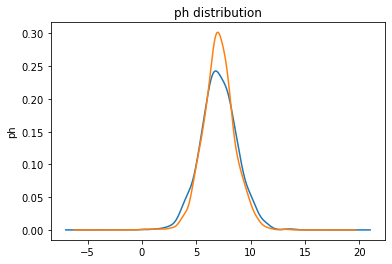

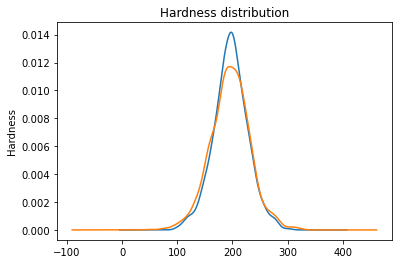

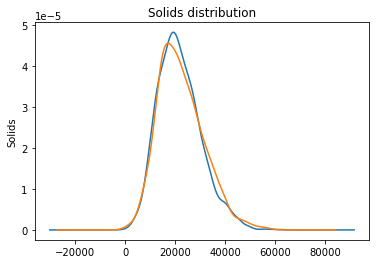

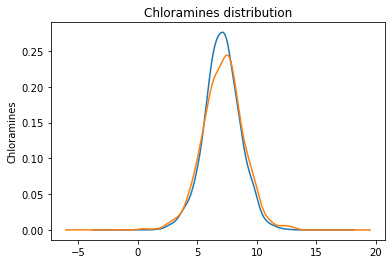

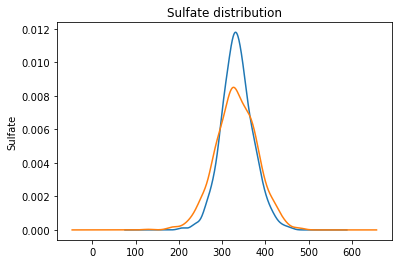

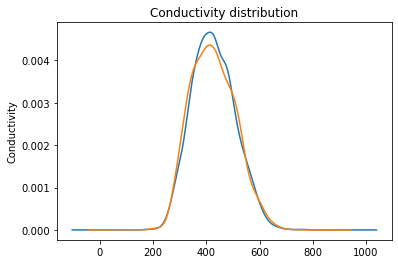

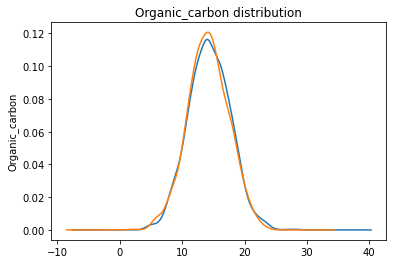

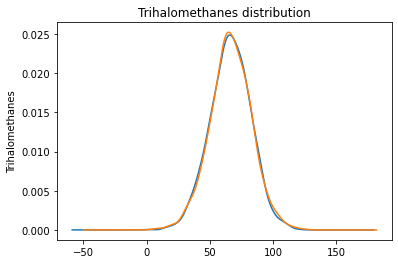

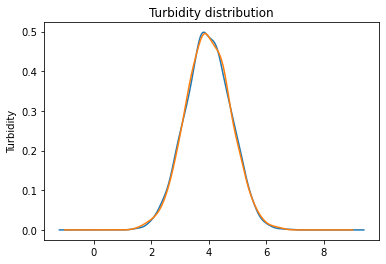

In [43]:
for column in data.columns[:-1]:
    data[data["Potability"] == 0][column].plot.kde()
    data[data["Potability"] == 1][column].plot.kde()
    plt.gca().set(title=f"{column} distribution", ylabel=column)

    plt.show()

## Dados Duplicados

Não existem dados duplicados nesse dataset.

In [12]:
len(data) - len(data.drop_duplicates())

0

## Balanceamento de Dados

Podemos ver que existe certo desbalanceamento dos dados, o que podemos tratar posteriormente.

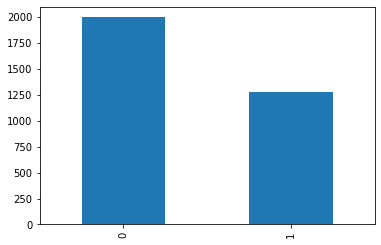

In [23]:
data["Potability"].value_counts().plot.bar()